In [1]:
import os
import random
os.chdir(r"/home/xavient/koodo_survey")
import string
import re
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',100)
import matplotlib.pyplot as plt
import spacy
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from textblob import Word
stopwords = nltk.corpus.stopwords.words('english')
seed = 42

In [2]:
rawdata = pd.read_excel('customer_verbatim_OMNI___clean_.xlsx')

In [17]:
data = rawdata.copy()

In [18]:
len(data)

168294

In [19]:
data.head()

,Respondent Id,MCX_ID,Line of Business,Agent Department Code (MU),Support level 4 (VP),Support level 4 TID (VP),Support level 3 (Director),Support level 3 TID (Director),Support level 2 (Ops Mgr),Support level 2 TID (Ops Mgr),...,Source label,Source date,Source ID,"B7_1. Agent (CSR) Performance Regarding the last call centre representative who assisted you, how would you rate their performan","Please share any comments you have regarding AGENT_FIRST_NAME, the SURVEY_BRAND customer service/Channel Care representative who assisted you.",Communicated clearly,Were willing to help,Treated me as a valued customer,Respected my time,Had the knowledge to respond to my inquiries
0,3524374,37364015008,Mobility,KDO_CR1_CELL300_TIE,LR,810410.0,DL,875189.0,MB,135951.0,...,INTERACTION_ID,20171229.0,706901562,Good,NaN,NaN,NaN,NaN,NaN,NaN
1,3524372,37364014950,Mobility,KDO_CR1_CELL300_TIE,LR,810410.0,DL,875189.0,JC,167206.0,...,INTERACTION_ID,20171229.0,706711123,Excellent,He was very helpful and polite.,NaN,NaN,NaN,NaN,NaN
2,3524371,37364014873,Mobility,KDO_TS_CELL300_TIE,LR,810410.0,DL,875189.0,MB,135951.0,...,INTERACTION_ID,20171229.0,706719963,Excellent,Helpful,NaN,NaN,NaN,NaN,NaN
3,3524367,37364014106,Mobility,KDO_CR1_CELL300_TIE,NaN,NaN,NaN,NaN,GP,146069.0,...,INTERACTION_ID,20171229.0,706835893,Very good,NaN,NaN,NaN,NaN,NaN,NaN
4,3524363,37364013496,Mobility,KDO_CR2_CELL300_TIE,LR,810410.0,DL,875189.0,JC,167206.0,...,INTERACTION_ID,20171229.0,706908437,Good,None. I spent almost 2hrs on the phone to resolve an issue and all I received was a credit of $...,NaN,NaN,NaN,NaN,NaN


In [20]:
data.shape

(168294, 29)

In [21]:
data.columns=['Respondent_Id', 'MCX_ID', 'Line_of_Business',
       'Agent_Department_Code_MU', 'Support_level_4_VP',
       'Support_level_4_TID_VP', 'Support_level_3_Director',
       'Support_level_3_TID_Director', 'Support_level_2_Ops_Mgr',
       'Support_level_2_TID_Ops_Mgr', 'Support_level_1_Team_Mgr',
       'Support_level_1_TID_Team_Mgr', 'Agent_Full_Name', 'Agent_ID',
       'Survey_Medium', 'Survey_Integrity_Hidden', 'COMPLETED_DATE',
       'Completed_Date', 'Source_database', 'Source_label', 'Source_date',
       'Source_ID','B7_1_Agent_CSR','Feedback',
       'Communicated_clearly', 'Were_willing_to_help',
       'Treated_me_as_a_valued_customer', 'Respected_my_time',
       'Had_the_knowledge_to_respond_to_my_inquiries']

In [22]:
object_columns = data.columns

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168294 entries, 0 to 168293
Data columns (total 29 columns):
Respondent_Id                                   168294 non-null int64
MCX_ID                                          168294 non-null int64
Line_of_Business                                168290 non-null object
Agent_Department_Code_MU                        168294 non-null object
Support_level_4_VP                              165450 non-null object
Support_level_4_TID_VP                          165450 non-null float64
Support_level_3_Director                        165450 non-null object
Support_level_3_TID_Director                    165501 non-null float64
Support_level_2_Ops_Mgr                         167459 non-null object
Support_level_2_TID_Ops_Mgr                     168270 non-null float64
Support_level_1_Team_Mgr                        168141 non-null object
Support_level_1_TID_Team_Mgr                    168294 non-null int64
Agent_Full_Name                      

In [24]:
# type casting to object
for column in object_columns:
    if data[column].dtypes=="int64":
        data[column] = data[column].astype('str')
    elif data[column].dtypes=="float64":
        data[column] = data[column].astype('str')

In [25]:
# select unique identifier
print(data.shape[0])
print(len(data['Respondent_Id'].unique()))
print(len(data['MCX_ID'].unique()))

168294
168294
168294


In [26]:
# set index for customer identification code
#rawdata = rawdata.set_index('Respondent_Id')
data = data.drop(['MCX_ID'],axis=1)
object_columns = data.columns

In [27]:
object_columns

Index(['Respondent_Id', 'Line_of_Business', 'Agent_Department_Code_MU',
       'Support_level_4_VP', 'Support_level_4_TID_VP',
       'Support_level_3_Director', 'Support_level_3_TID_Director',
       'Support_level_2_Ops_Mgr', 'Support_level_2_TID_Ops_Mgr',
       'Support_level_1_Team_Mgr', 'Support_level_1_TID_Team_Mgr',
       'Agent_Full_Name', 'Agent_ID', 'Survey_Medium',
       'Survey_Integrity_Hidden', 'COMPLETED_DATE', 'Completed_Date',
       'Source_database', 'Source_label', 'Source_date', 'Source_ID',
       'B7_1_Agent_CSR', 'Feedback', 'Communicated_clearly',
       'Were_willing_to_help', 'Treated_me_as_a_valued_customer',
       'Respected_my_time', 'Had_the_knowledge_to_respond_to_my_inquiries'],
      dtype='object')

In [28]:
data = data.drop(['Line_of_Business','Agent_Full_Name','Agent_ID','COMPLETED_DATE','Completed_Date','Source_date','Source_ID',
                        'Source_label','Source_database','Survey_Integrity_Hidden','Support_level_4_TID_VP',
                        'Support_level_3_TID_Director','Support_level_2_TID_Ops_Mgr','Support_level_1_TID_Team_Mgr'],axis=1)

In [29]:
data = data[data['Feedback'].str.len() > 1] ## this also includes spaces

In [38]:
data1 = data[data['B7_1_Agent_CSR']=='Excellent'] ## this also includes spaces
#data = data[data['Communicated_clearly']!='Excellent'] ## this also includes spaces
#data = data[data['Were_willing_to_help']!='Excellent'] ## this also includes spaces
#data = data[data['Treated_me_as_a_valued_customer']!='Excellent'] ## this also includes spaces
#data = data[data['Respected_my_time']!='Excellent'] ## this also includes spaces
#data = data[data['Had_the_knowledge_to_respond_to_my_inquiries']=='Excellent'] ## this also includes spaces
data1.to_csv("data_excellent.csv")

In [39]:
data = data[data['B7_1_Agent_CSR']!='Excellent'] ## this also includes spaces
#data = data[data['Communicated_clearly']!='Excellent'] ## this also includes spaces
#data = data[data['Were_willing_to_help']!='Excellent'] ## this also includes spaces
#data = data[data['Treated_me_as_a_valued_customer']!='Excellent'] ## this also includes spaces
#data = data[data['Respected_my_time']!='Excellent'] ## this also includes spaces
data = data[data['Had_the_knowledge_to_respond_to_my_inquiries']!='Excellent'] ## this also includes spaces

In [40]:
data.shape

(42368, 14)

In [41]:
# view levels per columns in the non-continious variable
object_columns = data.columns
for column in object_columns:
    print(column)
    print(data[column].unique())

Respondent_Id
['3524363' '3524290' '3524253' ... '1708641' '1708640' '1708635']
Agent_Department_Code_MU
['KDO_CR2_CELL300_TIE' 'KDO_CR1_CELL300_TIE' 'KDO_TS_CELL300_TIE'
 'MOB_KDPRE_CARE_ENG_TIE' 'MOB_PMTECHENG_TIE' 'MOB_PMCARENG_TIE'
 'MOB_KDPRE_CARE_FRE_TIE' 'MOB_PMCARFRE_TIE' 'MOB_KDATMENG_TIE'
 'MOB_KDCART_TIE' 'MOB_KDCARENG_TIE' 'MOB_KDCARFRE_TIE']
Support_level_4_VP
['LR' nan 'KS']
Support_level_3_Director
['DL' nan 'KI']
Support_level_2_Ops_Mgr
['JC' 'MB' 'JB' 'JL' 'GP' 'BC' 'NM' 'AM' 'JA' 'AA' 'CM' 'SN' 'GB' nan 'IM'
 'AG' 'JCA']
Support_level_1_Team_Mgr
['JFCM' 'RA' 'ER' 'JAVT' 'MMG' 'GIPR' 'JSLM' 'EL' 'GERA' 'RHSS' 'CRAC'
 'TL' 'ERLE' 'JAA' 'GGRR' 'CGMG' 'DEMT' 'KMHP' 'MAHR' 'LAGH' 'AEZC' 'FC'
 'LMCC' 'LAA' 'AEFV' 'NEMR' 'AN' 'MJSS' 'LBRP' 'ROAH' 'MLME' 'MAJS' nan
 'JJMD' 'JM' 'JL' 'MJ' 'FdCCV' 'AJNM' 'GR' 'NM' 'CV' 'MI' 'MV' 'AB' 'AD'
 'MAN' 'LD' 'GI' 'AS' 'ABG' 'EC' 'IMS' 'IC' 'DLC' 'AG' 'NMMO' 'GB' 'AEMT'
 'DA']
Survey_Medium
['SMS' 'Email_short' 'Email_long']
B7_1_Agent_

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42368 entries, 4 to 168284
Data columns (total 14 columns):
Respondent_Id                                   42368 non-null object
Agent_Department_Code_MU                        42368 non-null object
Support_level_4_VP                              41629 non-null object
Support_level_3_Director                        41629 non-null object
Support_level_2_Ops_Mgr                         42150 non-null object
Support_level_1_Team_Mgr                        42316 non-null object
Survey_Medium                                   42368 non-null object
B7_1_Agent_CSR                                  42366 non-null object
Feedback                                        42368 non-null object
Communicated_clearly                            11023 non-null object
Were_willing_to_help                            10894 non-null object
Treated_me_as_a_valued_customer                 10981 non-null object
Respected_my_time                               10

In [47]:
checkdata = data[data['Feedback'].notnull()]
checkdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42368 entries, 4 to 168284
Data columns (total 14 columns):
Respondent_Id                                   42368 non-null object
Agent_Department_Code_MU                        42368 non-null object
Support_level_4_VP                              41629 non-null object
Support_level_3_Director                        41629 non-null object
Support_level_2_Ops_Mgr                         42150 non-null object
Support_level_1_Team_Mgr                        42316 non-null object
Survey_Medium                                   42368 non-null object
B7_1_Agent_CSR                                  42366 non-null object
Feedback                                        42368 non-null object
Communicated_clearly                            11023 non-null object
Were_willing_to_help                            10894 non-null object
Treated_me_as_a_valued_customer                 10981 non-null object
Respected_my_time                               10

In [52]:
checkdata.head()

,Respondent_Id,Agent_Department_Code_MU,Support_level_4_VP,Support_level_3_Director,Support_level_2_Ops_Mgr,Support_level_1_Team_Mgr,Survey_Medium,B7_1_Agent_CSR,Feedback,Had_the_knowledge_to_respond_to_my_inquiries
4,3524363,KDO_CR2_CELL300_TIE,LR,DL,JC,JFCM,SMS,Good,None. I spent almost 2hrs on the phone to resolve an issue and all I received was a credit of $...,NaN
12,3524290,KDO_CR1_CELL300_TIE,LR,DL,MB,RA,SMS,Very good,The rep was pleasant and helpful,NaN
17,3524253,KDO_CR1_CELL300_TIE,LR,DL,MB,ER,SMS,Very good,Thanking her for the 100 mb.,NaN
23,3524187,KDO_CR1_CELL300_TIE,LR,DL,JB,JAVT,SMS,Poor,Might not been all his fault. The system he has to work with is out of date. Took too long on ...,NaN
31,3524107,KDO_CR1_CELL300_TIE,NaN,NaN,JL,MMG,SMS,Very good,sure was good.. but the wait,NaN


In [49]:
# Training
#checkdata = checkdata[checkdata['Communicated_clearly'].notnull()]
#checkdata = checkdata[checkdata['Treated_me_as_a_valued_customer'].notnull()]
#checkdata = checkdata[checkdata['Were_willing_to_help'].notnull()]
#checkdata = checkdata[checkdata['Respected_my_time'].notnull()]
checkdata = checkdata[checkdata['Had_the_knowledge_to_respond_to_my_inquiries'].isnull()]
checkdata = checkdata.drop(['Communicated_clearly','Treated_me_as_a_valued_customer','Were_willing_to_help',
                            'Respected_my_time'],axis=1)

In [53]:
checkdata.describe()

,Respondent_Id,Agent_Department_Code_MU,Support_level_4_VP,Support_level_3_Director,Support_level_2_Ops_Mgr,Support_level_1_Team_Mgr,Survey_Medium,B7_1_Agent_CSR,Feedback,Had_the_knowledge_to_respond_to_my_inquiries
count,31912,31912,31334,31334,31774,31881,31912,31912,31912,0.0
unique,31912,12,2,2,16,59,3,4,25227,0.0
top,733578,KDO_CR1_CELL300_TIE,LR,DL,JB,RHSS,SMS,Very good,None,NaN
freq,1,18496,31328,31328,8728,2173,31842,18444,447,NaN


In [54]:
# Training
#checkdata['Communicated_clearly'].value_counts()
#checkdata['Respected_my_time'].value_counts()
#checkdata['Treated_me_as_a_valued_customer'].value_counts()
#checkdata['Were_willing_to_help'].value_counts()
#checkdata['Had_the_knowledge_to_respond_to_my_inquiries'].value_counts()

In [55]:
# Training
'''
checkdata_verygood = checkdata[checkdata['Had_the_knowledge_to_respond_to_my_inquiries']=='Very good'].sample(1411)
checkdata_good = checkdata[checkdata['Had_the_knowledge_to_respond_to_my_inquiries']=='Good'].sample(1411)
checkdata_fair = checkdata[checkdata['Had_the_knowledge_to_respond_to_my_inquiries']=='Fair'].sample(1411)
checkdata_poor = checkdata[checkdata['Had_the_knowledge_to_respond_to_my_inquiries']=='Poor'].sample(1411)
'''

"\ncheckdata_verygood = checkdata[checkdata['Had_the_knowledge_to_respond_to_my_inquiries']=='Very good'].sample(1411)\ncheckdata_good = checkdata[checkdata['Had_the_knowledge_to_respond_to_my_inquiries']=='Good'].sample(1411)\ncheckdata_fair = checkdata[checkdata['Had_the_knowledge_to_respond_to_my_inquiries']=='Fair'].sample(1411)\ncheckdata_poor = checkdata[checkdata['Had_the_knowledge_to_respond_to_my_inquiries']=='Poor'].sample(1411)\n"

In [56]:
# Training
#checkdata = pd.concat([checkdata_verygood,checkdata_good,checkdata_fair,checkdata_poor],axis=0)
#checkdata.shape

In [59]:
checkdata['B7_1_Agent_CSR'].value_counts()

Very good    18444
Good          6360
Poor          4175
Fair          2933
Name: B7_1_Agent_CSR, dtype: int64

In [60]:
#checkdata['Had_the_knowledge_to_respond_to_my_inquiries'].value_counts()

In [61]:
# Training
#checkdata['Had_the_knowledge_to_respond_to_my_inquiries'].value_counts().plot('pie')
#plt.show()

In [62]:
#pd.crosstab(checkdata['B7_1_Agent_CSR'],checkdata['Communicated_clearly'])

In [63]:
#pd.crosstab(checkdata['B7_1_Agent_CSR'],checkdata['Were_willing_to_help'])

In [64]:
#pd.crosstab(checkdata['B7_1_Agent_CSR'],checkdata['Treated_me_as_a_valued_customer'])

In [65]:
#pd.crosstab(checkdata['B7_1_Agent_CSR'],checkdata['Respected_my_time'])

In [67]:
#pd.crosstab(checkdata['B7_1_Agent_CSR'],checkdata['Had_the_knowledge_to_respond_to_my_inquiries'])


In [68]:
checkdata['is_mins'] = checkdata['Feedback'].apply(lambda x: " ".join(x.lower() for x in x.split())).str.contains('mins')
checkdata['is_minute'] = checkdata['Feedback'].apply(lambda x: " ".join(x.lower() for x in x.split())).str.contains('minute')
checkdata['is_minutes'] = checkdata['Feedback'].apply(lambda x: " ".join(x.lower() for x in x.split())).str.contains('minutes')
checkdata['is_hour'] = checkdata['Feedback'].apply(lambda x: " ".join(x.lower() for x in x.split())).str.contains('hour')
checkdata['is_hours'] = checkdata['Feedback'].apply(lambda x: " ".join(x.lower() for x in x.split())).str.contains('hours')
checkdata['is_hrs'] = checkdata['Feedback'].apply(lambda x: " ".join(x.lower() for x in x.split())).str.contains('hrs')
checkdata['is_hr'] = checkdata['Feedback'].apply(lambda x: " ".join(x.lower() for x in x.split())).str.contains('hr')

In [69]:
checkdata['Feedback'] = checkdata['Feedback'].astype('str')

In [70]:
checkdata['char_count'] = np.log2(checkdata['Feedback'].str.len())#**2

In [71]:
checkdata['word_count'] = np.log2(checkdata['Feedback'].apply(lambda x: len((x).split(" "))))#**2

In [72]:
checkdata['numerics'] = np.log2(checkdata['Feedback'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))+1)#**2

In [73]:
checkdata['upper'] = np.log2(checkdata['Feedback'].apply(lambda x: len([x for x in x.split() if x.isupper()]))+1)#**2

In [74]:
def avg_word(text):
  words = (text).split()
  return (sum(len(word) for word in words)/len(words))

checkdata['avg_word'] = np.log2(checkdata['Feedback'].apply(lambda x: avg_word(x)))

In [75]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

checkdata['stopwords'] = np.log2(checkdata['Feedback'].apply(lambda x: len([x for x in x.split() if x in stop]))+1)#**2

In [76]:
import string
def count_punct(text):
    count = sum(1 for char in text if char in string.punctuation)
    return round(count/(len(text)-text.count(" ")),3)*100

checkdata['punc%'] = np.log2(checkdata['Feedback'].apply(lambda x: count_punct(x))+1)#**2

In [77]:
checkdata.head()

,Respondent_Id,Agent_Department_Code_MU,Support_level_4_VP,Support_level_3_Director,Support_level_2_Ops_Mgr,Support_level_1_Team_Mgr,Survey_Medium,B7_1_Agent_CSR,Feedback,Had_the_knowledge_to_respond_to_my_inquiries,...,is_hours,is_hrs,is_hr,char_count,word_count,numerics,upper,avg_word,stopwords,punc%
4,3524363,KDO_CR2_CELL300_TIE,LR,DL,JC,JFCM,SMS,Good,None. I spent almost 2hrs on the phone to resolve an issue and all I received was a credit of $...,NaN,...,False,True,True,9.204571,6.894818,0.0,3.321928,2.037153,5.700440,2.201634
12,3524290,KDO_CR1_CELL300_TIE,LR,DL,MB,RA,SMS,Very good,The rep was pleasant and helpful,NaN,...,False,False,False,5.000000,2.584963,0.0,0.000000,2.169925,1.584963,0.000000
17,3524253,KDO_CR1_CELL300_TIE,LR,DL,MB,ER,SMS,Very good,Thanking her for the 100 mb.,NaN,...,False,False,False,4.807355,2.584963,1.0,0.000000,1.938599,2.000000,2.405992
23,3524187,KDO_CR1_CELL300_TIE,LR,DL,JB,JAVT,SMS,Poor,Might not been all his fault. The system he has to work with is out of date. Took too long on ...,NaN,...,False,False,False,7.129283,5.044394,0.0,0.000000,1.847997,4.321928,2.232661
31,3524107,KDO_CR1_CELL300_TIE,NaN,NaN,JL,MMG,SMS,Very good,sure was good.. but the wait,NaN,...,False,False,False,4.807355,2.584963,0.0,0.000000,1.938599,2.000000,3.277985


In [78]:
checkdata['Feedback1'] = checkdata['Feedback'].apply(lambda x: " ".join(x.lower() for x in x.split()))
checkdata['Feedback1'] = checkdata['Feedback1'].str.replace('[^\w\s]','')
checkdata['Feedback1'] = checkdata['Feedback1'].apply(lambda x:''.join([x for x in x if not x.isdigit()]))
checkdata['Feedback1'] = checkdata['Feedback1'].apply(lambda x: " ".join(ps.stem(x) for x in x.split() if x not in stop))
#checkdata['Feedback1'] = checkdata['Feedback1'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#[ps.stem(word) for word in token if word not in stopwords]

In [79]:
checkdata[['Feedback','Feedback1']].tail(20)

,Feedback,Feedback1
168189,No comments,comment
168192,I meant to reply with 5 to the answer it was treated fairly not 1. The first rep I talked too to...,meant repli answer treat fairli first rep talk told deal said set week later noth chang call bac...
168198,She was very helpful.,help
168204,he was good,good
168206,"She was good, however your system wouldnt take our payment",good howev system wouldnt take payment
168224,He helped very well. Politely and courtesy .,help well polit courtesi
168236,She was nice but could not help me.,nice could help
168240,Very nice,nice
168241,My rep was clear and quickly found the information I needed. Thank you,rep clear quickli found inform need thank
168244,When I asked him a question I got the impression that he was ready to argue with me even though ...,ask question got impress readi argu even though new didnt understand bill friendli becam clear n...


In [80]:
#freq = pd.Series(' '.join(checkdata['Feedback1']).split()).value_counts()

In [81]:
#freq = pd.DataFrame(freq).to_csv("freq.csv")

In [82]:
#freq = pd.read_csv("freq.csv")
#freq.columns = ['word','tf']

In [83]:
#tf1 = (checkdata['Feedback1']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
#tf1.columns = ['words','tf']


In [84]:
#for i,word in enumerate(tf1['words']):
#  tf1.loc[i, 'idf'] = np.log(checkdata.shape[0]/(len(checkdata[checkdata['Feedback1'].str.contains(word)])))

In [85]:
#tf1['tfidf'] = tf1['tf'] * tf1['idf']

In [86]:
#tf1.describe()

,tf,idf,tfidf
count,9518.000000,9518.000000,9518.000000
mean,22.647195,8.829047,99.852415
std,153.943759,2.076739,421.492594
min,1.000000,0.000000,0.000000
25%,1.000000,7.885831,10.370737
50%,1.000000,9.677590,10.370737
75%,4.000000,10.370737,35.937772
max,7908.000000,10.370737,11220.730132


In [53]:
#tf1['logtfidf'] = np.log(tf1['tfidf']+1)

In [54]:
#tf1['logtfidf'].plot('kde')

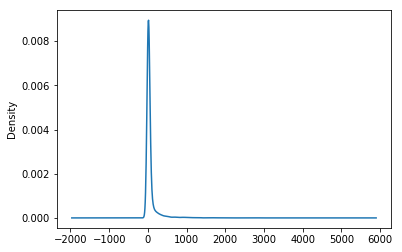

In [55]:
#tf1['tfidf'].plot('kde')

In [56]:
#tf1[tf1['tfidf'] > tf1['tfidf'].quantile(.5)].describe()

,tf,idf,tfidf
count,3036.000000,3036.000000,3036.000000
mean,33.754611,6.846284,136.658344
std,115.156643,1.674344,300.881406
min,2.000000,0.264614,9.381166
25%,3.000000,5.789195,18.509863
50%,5.000000,7.309021,38.227467
75%,18.000000,8.156319,109.169204
max,2431.000000,9.254931,3930.957718


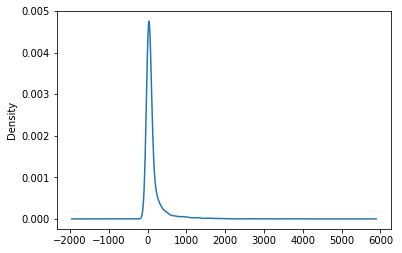

In [57]:
#tf1['tfidf'][tf1['tfidf'] > tf1['tfidf'].quantile(.5)].plot('kde')

In [58]:
#tf1 = tf1[tf1['tfidf'] > tf1['tfidf'].quantile(.5)]

In [59]:
#tf1.describe()

,tf,idf,tfidf
count,3036.000000,3036.000000,3036.000000
mean,33.754611,6.846284,136.658344
std,115.156643,1.674344,300.881406
min,2.000000,0.264614,9.381166
25%,3.000000,5.789195,18.509863
50%,5.000000,7.309021,38.227467
75%,18.000000,8.156319,109.169204
max,2431.000000,9.254931,3930.957718


In [60]:
#tf_keeplist = list(tf1['words'])

In [ ]:
tf_keeplist = pickle.load(open('tf_keeplist.sav', 'rb'))

In [61]:
len(tf_keeplist)

3036

In [62]:
checkdata['Feedback1'] = checkdata['Feedback1'].apply(lambda x: " ".join(x for x in x.split() if x in tf_keeplist))

In [63]:
checkdata.head()

,Respondent_Id,Agent_Department_Code_MU,Support_level_4_VP,Support_level_3_Director,Support_level_2_Ops_Mgr,Support_level_1_Team_Mgr,Survey_Medium,B7_1_Agent_CSR,Feedback,Had_the_knowledge_to_respond_to_my_inquiries,...,is_hrs,is_hr,char_count,word_count,numerics,upper,avg_word,stopwords,punc%,Feedback1
79,3523509,KDO_CR1_CELL300_TIE,NaN,NaN,JL,MMG,Email_short,Fair,She was polite and she tried. I just think the fine print in the plan I was calling about is/wa...,Poor,...,False,False,7.936638,5.584963,0.0,2.0,2.074768,4.459432,2.321928,polit tri think fine print plan call confus even didnt fulli understand couldnt explain logic wa...
89,3523102,KDO_CR2_CELL300_TIE,LR,DL,JC,EL,Email_short,Very good,Good rep,Very good,...,False,False,3.000000,1.000000,0.0,0.0,1.807355,0.000000,0.000000,good rep
90,3523089,KDO_CR1_CELL300_TIE,LR,DL,JC,RHSS,Email_short,Very good,"Friendly, helpful: a good experience",Very good,...,False,False,5.169925,2.321928,0.0,0.0,2.678072,1.000000,2.847997,friendli help good experi
91,3523082,KDO_CR1_CELL300_TIE,LR,DL,JC,CRAC,Email_short,Very good,All good.,Very good,...,False,False,3.169925,1.000000,0.0,0.0,2.000000,0.000000,3.754888,good
92,3523075,KDO_CR1_CELL300_TIE,NaN,NaN,GP,TL,Email_short,Very good,"I appreciate Carlos' help on the customer loyalty request, however, the Tab credits were not app...",Good,...,False,False,7.467606,4.954196,0.0,1.0,2.245476,3.700440,2.350497,appreci carlo help custom loyalti request howev tab credit appli line account pleas updat get ch...


In [64]:
#freq['count'].median()

In [65]:
#remove_column_list = list(freq[freq['count']== 1.0]['word'])
#checkdata = checkdata.drop(['Feedback1'],axis=1)

In [66]:
def condition(rating):
#    if rating == 'Excellent':
#        return 0
    if rating == 'Very good':
        return 0
    elif rating == 'Good':
        return 0
    elif rating == 'Fair':
        return 1
    elif rating == 'Poor':
        return 1
    else:
        return "missing"

In [67]:
checkdata['target'] = checkdata['Had_the_knowledge_to_respond_to_my_inquiries'].apply(lambda x: condition(x))
#checkdata['B7_1_Agent_CSR'] = checkdata['B7_1_Agent_CSR'].apply(lambda x: condition(x))
checkdata = checkdata.drop(['Had_the_knowledge_to_respond_to_my_inquiries'],axis=1)

In [68]:
checkdata.target.value_counts()

0    7383
1    3073
Name: target, dtype: int64

In [69]:
'''
checkdata['is_Excellent'] = checkdata['B7_1_Agent_CSR'].apply(lambda x: 1 if x==0 else 0)
checkdata['is_Vgood'] = checkdata['B7_1_Agent_CSR'].apply(lambda x: 1 if x==1 else 0)
checkdata['is_good'] = checkdata['B7_1_Agent_CSR'].apply(lambda x: 1 if x==2 else 0)
checkdata['is_fair'] = checkdata['B7_1_Agent_CSR'].apply(lambda x: 1 if x==3 else 0)
checkdata['is_poor'] = checkdata['B7_1_Agent_CSR'].apply(lambda x: 1 if x==4 else 0)
checkdata = checkdata.drop(['B7_1_Agent_CSR'],axis=1)
'''

"\ncheckdata['is_Excellent'] = checkdata['B7_1_Agent_CSR'].apply(lambda x: 1 if x==0 else 0)\ncheckdata['is_Vgood'] = checkdata['B7_1_Agent_CSR'].apply(lambda x: 1 if x==1 else 0)\ncheckdata['is_good'] = checkdata['B7_1_Agent_CSR'].apply(lambda x: 1 if x==2 else 0)\ncheckdata['is_fair'] = checkdata['B7_1_Agent_CSR'].apply(lambda x: 1 if x==3 else 0)\ncheckdata['is_poor'] = checkdata['B7_1_Agent_CSR'].apply(lambda x: 1 if x==4 else 0)\ncheckdata = checkdata.drop(['B7_1_Agent_CSR'],axis=1)\n"

In [70]:
#cols = ['Feedback']  + [col for col in checkdata if col != 'Feedback']
#checkdata = checkdata[cols]

In [71]:
'''
# Training
from matplotlib import pyplot
%matplotlib inline
bins = np.linspace(0,200,40)
pyplot.hist(checkdata[checkdata['target']==0]['word_count'],bins,alpha=0.5, normed=True,label='bad')
pyplot.hist(checkdata[checkdata['target']==1]['word_count'],bins,alpha=0.5, normed=True,label='good')
pyplot.legend(loc='upper right')
pyplot.show()
'''

"\n# Training\nfrom matplotlib import pyplot\n%matplotlib inline\nbins = np.linspace(0,200,40)\npyplot.hist(checkdata[checkdata['target']==0]['word_count'],bins,alpha=0.5, normed=True,label='bad')\npyplot.hist(checkdata[checkdata['target']==1]['word_count'],bins,alpha=0.5, normed=True,label='good')\npyplot.legend(loc='upper right')\npyplot.show()\n"

In [72]:
'''# Training
from matplotlib import pyplot
%matplotlib inline
bins = np.linspace(0,800,40)
pyplot.hist(checkdata[checkdata['target']==0]['char_count'],bins,alpha=0.5, normed=True,label='bad')
pyplot.hist(checkdata[checkdata['target']==1]['char_count'],bins,alpha=0.5, normed=True,label='good')
pyplot.legend(loc='upper right')
pyplot.show()
'''

"# Training\nfrom matplotlib import pyplot\n%matplotlib inline\nbins = np.linspace(0,800,40)\npyplot.hist(checkdata[checkdata['target']==0]['char_count'],bins,alpha=0.5, normed=True,label='bad')\npyplot.hist(checkdata[checkdata['target']==1]['char_count'],bins,alpha=0.5, normed=True,label='good')\npyplot.legend(loc='upper right')\npyplot.show()\n"

In [73]:
'''# Training
from matplotlib import pyplot
%matplotlib inline
bins = np.linspace(0,10,40)
pyplot.hist(checkdata[checkdata['target']==0]['avg_word'],bins,alpha=0.5, normed=True,label='bad')
pyplot.hist(checkdata[checkdata['target']==1]['avg_word'],bins,alpha=0.5, normed=True,label='good')
pyplot.legend(loc='upper right')
pyplot.show()
'''

"# Training\nfrom matplotlib import pyplot\n%matplotlib inline\nbins = np.linspace(0,10,40)\npyplot.hist(checkdata[checkdata['target']==0]['avg_word'],bins,alpha=0.5, normed=True,label='bad')\npyplot.hist(checkdata[checkdata['target']==1]['avg_word'],bins,alpha=0.5, normed=True,label='good')\npyplot.legend(loc='upper right')\npyplot.show()\n"

In [74]:
'''# Training
from matplotlib import pyplot
%matplotlib inline
bins = np.linspace(0,100,40)
pyplot.hist(checkdata[checkdata['target']==0]['stopwords'],bins,alpha=0.5, normed=True,label='bad')
pyplot.hist(checkdata[checkdata['target']==1]['stopwords'],bins,alpha=0.5, normed=True,label='good')
pyplot.legend(loc='upper right')
pyplot.show()
'''

"# Training\nfrom matplotlib import pyplot\n%matplotlib inline\nbins = np.linspace(0,100,40)\npyplot.hist(checkdata[checkdata['target']==0]['stopwords'],bins,alpha=0.5, normed=True,label='bad')\npyplot.hist(checkdata[checkdata['target']==1]['stopwords'],bins,alpha=0.5, normed=True,label='good')\npyplot.legend(loc='upper right')\npyplot.show()\n"

In [75]:
'''# Training
from matplotlib import pyplot
%matplotlib inline
bins = np.linspace(0,20,40)
pyplot.hist(checkdata[checkdata['target']==0]['punc%'],bins,alpha=0.5,normed=True,label='bad')
pyplot.hist(checkdata[checkdata['target']==1]['punc%'],bins,alpha=0.5, normed=True,label='good')
pyplot.legend(loc='upper right')
pyplot.show()
'''

"# Training\nfrom matplotlib import pyplot\n%matplotlib inline\nbins = np.linspace(0,20,40)\npyplot.hist(checkdata[checkdata['target']==0]['punc%'],bins,alpha=0.5,normed=True,label='bad')\npyplot.hist(checkdata[checkdata['target']==1]['punc%'],bins,alpha=0.5, normed=True,label='good')\npyplot.legend(loc='upper right')\npyplot.show()\n"

In [76]:
'''# Training
from matplotlib import pyplot
%matplotlib inline
bins = np.linspace(0,15,40)
pyplot.hist(checkdata[checkdata['target']==0]['upper'],bins,alpha=0.5, normed=True,label='bad')
pyplot.hist(checkdata[checkdata['target']==1]['upper'],bins,alpha=0.5, normed=True,label='good')
pyplot.legend(loc='upper right')
pyplot.show()
'''

"# Training\nfrom matplotlib import pyplot\n%matplotlib inline\nbins = np.linspace(0,15,40)\npyplot.hist(checkdata[checkdata['target']==0]['upper'],bins,alpha=0.5, normed=True,label='bad')\npyplot.hist(checkdata[checkdata['target']==1]['upper'],bins,alpha=0.5, normed=True,label='good')\npyplot.legend(loc='upper right')\npyplot.show()\n"

In [77]:
checkdata.columns

Index(['Respondent_Id', 'Agent_Department_Code_MU', 'Support_level_4_VP',
       'Support_level_3_Director', 'Support_level_2_Ops_Mgr',
       'Support_level_1_Team_Mgr', 'Survey_Medium', 'B7_1_Agent_CSR',
       'Feedback', 'is_mins', 'is_minute', 'is_minutes', 'is_hour', 'is_hours',
       'is_hrs', 'is_hr', 'char_count', 'word_count', 'numerics', 'upper',
       'avg_word', 'stopwords', 'punc%', 'Feedback1', 'target'],
      dtype='object')

In [78]:
#!python -m spacy download en_core_web_lg

In [79]:
#import re
#checkdata['is_wait_true'] = checkdata.Feedback.contains('wait', regex=True)

In [80]:
checkdata = checkdata.drop(['Feedback'],axis=1)

In [81]:
checkdata.shape
all_obj_columns = checkdata.columns

In [82]:
checkdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10456 entries, 79 to 168271
Data columns (total 24 columns):
Respondent_Id               10456 non-null object
Agent_Department_Code_MU    10456 non-null object
Support_level_4_VP          10295 non-null object
Support_level_3_Director    10295 non-null object
Support_level_2_Ops_Mgr     10376 non-null object
Support_level_1_Team_Mgr    10435 non-null object
Survey_Medium               10456 non-null object
B7_1_Agent_CSR              10454 non-null object
is_mins                     10456 non-null bool
is_minute                   10456 non-null bool
is_minutes                  10456 non-null bool
is_hour                     10456 non-null bool
is_hours                    10456 non-null bool
is_hrs                      10456 non-null bool
is_hr                       10456 non-null bool
char_count                  10456 non-null float64
word_count                  10456 non-null float64
numerics                    10456 non-null float64


In [83]:
# missing value imputation strategy: create a new level called 'UNKNOWN'

for column in all_obj_columns:
    if checkdata[column].dtypes=="object":
        checkdata[column] = checkdata[column].fillna("UKNOWN").astype('object')

In [84]:
checkdata_notarget = checkdata.drop(['target'],axis=1)

In [85]:
all_obj_columns = checkdata_notarget.columns
all_obj_columns

Index(['Respondent_Id', 'Agent_Department_Code_MU', 'Support_level_4_VP',
       'Support_level_3_Director', 'Support_level_2_Ops_Mgr',
       'Support_level_1_Team_Mgr', 'Survey_Medium', 'B7_1_Agent_CSR',
       'is_mins', 'is_minute', 'is_minutes', 'is_hour', 'is_hours', 'is_hrs',
       'is_hr', 'char_count', 'word_count', 'numerics', 'upper', 'avg_word',
       'stopwords', 'punc%', 'Feedback1'],
      dtype='object')

In [86]:
# scale the numerical variables to bring the numerical variables to the same scale for fault tolerance
from sklearn.preprocessing import scale

for column in all_obj_columns:
    if checkdata[column].dtypes in ["int64","float64"] :
        checkdata[column] = scale(checkdata[column].astype('float64'))

In [87]:
checkdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10456 entries, 79 to 168271
Data columns (total 24 columns):
Respondent_Id               10456 non-null object
Agent_Department_Code_MU    10456 non-null object
Support_level_4_VP          10456 non-null object
Support_level_3_Director    10456 non-null object
Support_level_2_Ops_Mgr     10456 non-null object
Support_level_1_Team_Mgr    10456 non-null object
Survey_Medium               10456 non-null object
B7_1_Agent_CSR              10456 non-null object
is_mins                     10456 non-null bool
is_minute                   10456 non-null bool
is_minutes                  10456 non-null bool
is_hour                     10456 non-null bool
is_hours                    10456 non-null bool
is_hrs                      10456 non-null bool
is_hr                       10456 non-null bool
char_count                  10456 non-null float64
word_count                  10456 non-null float64
numerics                    10456 non-null float64


In [88]:
#from scipy import stats
#stats.ttest_ind(checkdata['char_count'], checkdata['target'])

In [89]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

from sklearn.manifold import TSNE

/home/xavient/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [90]:
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(checkdata['Feedback1'])

In [91]:
tokenizer

In [92]:
import pickle
tokenizer_mytime1 = 'tokenizer.sav'
pickle.dump(tokenizer, open(tokenizer_mytime1, 'wb'))

In [93]:
tokenizer_mytime1 = pickle.load(open('tokenizer.sav', 'rb'))
#print("tokenizer loaded: ")# + str(result))

In [94]:
tokenizer_mytime1

In [95]:
sequences = tokenizer_mytime1.texts_to_sequences(checkdata['Feedback1'])
data = pad_sequences(sequences, maxlen=50)

In [96]:
labels = checkdata['target']

In [97]:
data.shape

(10456, 50)

In [98]:
model_lstm = Sequential()
model_lstm.add(Embedding(20000, 100, input_length=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
#model_lstm.fit(data, np.array(labels), validation_split=0.4, epochs=3)

In [100]:
# model 4
#from sklearn.model_selection import train_test_split
#X_train6, X_test6, y_train6, y_test6 = train_test_split(data, labels, test_size = .3, random_state = seed)

In [101]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size = .4, random_state=seed)

# Using smote to increase the number of under-represented class
sm = SMOTE(random_state = 12, ratio = 'minority')

X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
X_train_res.shape, y_train_res.shape, X_val.shape, y_val.shape

((8832, 50), (8832,), (4183, 50), (4183,))

In [102]:
model_lstm.fit(X_train_res, y_train_res, validation_split=0.3, epochs=7, batch_size=32)

Train on 6182 samples, validate on 2650 samples
Epoch 1/7
6182/6182 [==============================] - 25s 4ms/step - loss: 0.5546 - acc: 0.7166 - val_loss: 1.3172 - val_acc: 0.1879
Epoch 2/7
6182/6182 [==============================] - 24s 4ms/step - loss: 0.4754 - acc: 0.7679 - val_loss: 1.1523 - val_acc: 0.3358
Epoch 3/7
6182/6182 [==============================] - 24s 4ms/step - loss: 0.4239 - acc: 0.8112 - val_loss: 1.0294 - val_acc: 0.3875
Epoch 4/7
6182/6182 [==============================] - 23s 4ms/step - loss: 0.3963 - acc: 0.8217 - val_loss: 1.3911 - val_acc: 0.3189
Epoch 5/7
6182/6182 [==============================] - 23s 4ms/step - loss: 0.3579 - acc: 0.8483 - val_loss: 1.4181 - val_acc: 0.3860
Epoch 6/7
6182/6182 [==============================] - 23s 4ms/step - loss: 0.3246 - acc: 0.8643 - val_loss: 1.6003 - val_acc: 0.3875
Epoch 7/7
6182/6182 [==============================] - 23s 4ms/step - loss: 0.2962 - acc: 0.8806 - val_loss: 1.8744 - val_acc: 0.3525


In [103]:
# import metrics for model evaluation
# Training
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix,classification_report,precision_score,roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
#sklearn.metrics.cohen_kappa_score(y1, y2, labels=None, weights=None, sample_weight=None)
# create function to evaluate model performance

def evaluate_classes(model, X_test, y_test):
    y_pred = model.predict_classes(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred, sample_weight=None)
    #tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    #precision = precision_score(y_test,y_pred,average='micro')
    print("accuracy :" +str(accuracy))
    print("cohen_kappa :" +str(cohen_kappa))
    print("roc :" +str(roc))
    print("matrix :")
    print(matrix)
    #print("report :")
    #print(report)
    return None# accuracy

In [104]:
evaluate_classes(model_lstm,X_val,y_val)

accuracy :0.7403777193401865
cohen_kappa :0.3231367381384903
roc :0.6502768113724655
matrix :
[[2568  399]
 [ 687  529]]


In [894]:
#xgbclass.fit(X_train6, y_train6) 

In [895]:
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(vocabulary_size, 100, input_length=50))
    model_conv.add(Dropout(0.2))
    model_conv.add(Conv1D(32, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_conv

In [896]:
model_conv = create_conv_model()
model_conv.fit(X_train_res, y_train_res, validation_split=0.3, epochs=5,batch_size=32)

Train on 6182 samples, validate on 2650 samples
Epoch 1/5
6182/6182 [==============================] - 8s 1ms/step - loss: 0.5684 - acc: 0.7126 - val_loss: 0.9850 - val_acc: 0.2340
Epoch 2/5
6182/6182 [==============================] - 6s 949us/step - loss: 0.4997 - acc: 0.7722 - val_loss: 1.1828 - val_acc: 0.2868
Epoch 3/5
6182/6182 [==============================] - 6s 909us/step - loss: 0.4202 - acc: 0.8235 - val_loss: 1.2994 - val_acc: 0.3419
Epoch 4/5
6182/6182 [==============================] - 6s 943us/step - loss: 0.3500 - acc: 0.8627 - val_loss: 2.4319 - val_acc: 0.2000
Epoch 5/5
6182/6182 [==============================] - 5s 883us/step - loss: 0.2970 - acc: 0.8834 - val_loss: 2.0512 - val_acc: 0.3049


In [897]:
evaluate_classes(model_conv,X_val,y_val)

accuracy :0.7425292852020081
cohen_kappa :0.32646168690953525
roc :0.6513081672520532
matrix :
[[2579  388]
 [ 689  527]]


In [1061]:
'''
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
'''

"\nembeddings_index = dict()\nf = open('glove.6B.100d.txt')\nfor line in f:\n    values = line.split()\n    word = values[0]\n    coefs = np.asarray(values[1:], dtype='float32')\n    embeddings_index[word] = coefs\nf.close()\nprint('Loaded %s word vectors.' % len(embeddings_index))\n"

In [1062]:
'''# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
'''

'# create a weight matrix for words in training docs\nembedding_matrix = np.zeros((vocabulary_size, 100))\nfor word, index in tokenizer.word_index.items():\n    if index > vocabulary_size - 1:\n        break\n    else:\n        embedding_vector = embeddings_index.get(word)\n        if embedding_vector is not None:\n            embedding_matrix[index] = embedding_vector\n'

In [1063]:
'''
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 100, input_length=50, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
'''

"\nmodel_glove = Sequential()\nmodel_glove.add(Embedding(vocabulary_size, 100, input_length=50, weights=[embedding_matrix], trainable=False))\nmodel_glove.add(Dropout(0.2))\nmodel_glove.add(Conv1D(64, 5, activation='relu'))\nmodel_glove.add(MaxPooling1D(pool_size=4))\nmodel_glove.add(LSTM(100))\nmodel_glove.add(Dense(1, activation='sigmoid'))\nmodel_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\n"

In [1064]:
#model_glove.fit(data, np.array(labels), validation_split=0.4, epochs = 3)

In [1065]:
#model_glove.fit(X_train6, y_train6, validation_split=0.4, epochs = 3)

In [1066]:
#evaluate_classes(model_glove,X_test6,y_test6)

In [1067]:
#lstm_embds = model_lstm.layers[0].get_weights()[0]

In [1068]:
#conv_embds = model_conv.layers[0].get_weights()[0]

In [1069]:
#glove_emds = model_glove.layers[0].get_weights()[0]

In [1070]:
#word_list = []
#for word, i in tokenizer.word_index.items():
#    word_list.append(word)

In [1071]:
#len(word_list)

In [1072]:
'''
def plot_words(data, start, stop, step):
    trace = go.Scatter(
        x = data[start:stop:step,0], 
        y = data[start:stop:step, 1],
        mode = 'markers',
        text= word_list[start:stop:step]
    )
    layout = dict(title= 't-SNE 1 vs t-SNE 2',
                  yaxis = dict(title='t-SNE 2'),
                  xaxis = dict(title='t-SNE 1'),
                  hovermode= 'closest')
    fig = dict(data = [trace], layout= layout)
    py.iplot(fig)
'''

"\ndef plot_words(data, start, stop, step):\n    trace = go.Scatter(\n        x = data[start:stop:step,0], \n        y = data[start:stop:step, 1],\n        mode = 'markers',\n        text= word_list[start:stop:step]\n    )\n    layout = dict(title= 't-SNE 1 vs t-SNE 2',\n                  yaxis = dict(title='t-SNE 2'),\n                  xaxis = dict(title='t-SNE 1'),\n                  hovermode= 'closest')\n    fig = dict(data = [trace], layout= layout)\n    py.iplot(fig)\n"

In [1073]:
#lstm_tsne_embds = TSNE(n_components=2).fit_transform(lstm_embds)

In [1074]:
#plot_words(lstm_tsne_embds, 0, 2000, 1)

In [1075]:
#conv_tsne_embds = TSNE(n_components=2).fit_transform(conv_embds)

In [1076]:
#plot_words(conv_tsne_embds, 0, 2000, 1)

In [1077]:
#glove_tsne_embds = TSNE(n_components=2).fit_transform(glove_emds)

In [1078]:
#plot_words(glove_tsne_embds, 0, 2000, 1)

In [1079]:
#from gensim.models import Word2Vec
#import nltk
#nltk.download('punkt')

In [1080]:
#checkdata['tokenized'] = checkdata.apply(lambda row : nltk.word_tokenize(row['Feedback1']), axis=1)

In [1081]:
#model_w2v = Word2Vec(checkdata['tokenized'], size=100)

In [1082]:
#X = model_w2v[model_w2v.wv.vocab]

In [1083]:
#from sklearn.decomposition import TruncatedSVD

In [1084]:
#Tokenizer

In [1085]:
#from sklearn.decomposition import TruncatedSVD

#tsvd = TruncatedSVD(n_components=5, n_iter=10)
#result = tsvd.fit_transform(X)

#result.shape

In [1086]:
'''

tsvd_word_list = []
words = list(model_w2v.wv.vocab)
for i, word in enumerate(words):
    tsvd_word_list.append(word)
number_of_words=50
trace = go.Scatter(
    x = result[0:number_of_words, 0], 
    y = result[0:number_of_words, 1],
    mode = 'markers',
    text= tsvd_word_list[0:number_of_words]
)

layout = dict(title= 'SVD 1 vs SVD 2',
              yaxis = dict(title='SVD 2'),
              xaxis = dict(title='SVD 1'),
              hovermode= 'closest')

fig = dict(data = [trace], layout= layout)
py.iplot(fig)
'''

"\n\ntsvd_word_list = []\nwords = list(model_w2v.wv.vocab)\nfor i, word in enumerate(words):\n    tsvd_word_list.append(word)\nnumber_of_words=50\ntrace = go.Scatter(\n    x = result[0:number_of_words, 0], \n    y = result[0:number_of_words, 1],\n    mode = 'markers',\n    text= tsvd_word_list[0:number_of_words]\n)\n\nlayout = dict(title= 'SVD 1 vs SVD 2',\n              yaxis = dict(title='SVD 2'),\n              xaxis = dict(title='SVD 1'),\n              hovermode= 'closest')\n\nfig = dict(data = [trace], layout= layout)\npy.iplot(fig)\n"

In [1087]:
'''
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
def clean_text(text):
    no_punct = "".join([char for char in text if char not in string.punctuation])
    token = re.split('\W+',no_punct)
    nostop = ([ps.stem(word) for word in token if word not in stopwords])
    return nostop
'''

'\nfrom nltk.tokenize import sent_tokenize, word_tokenize\nfrom nltk.stem import PorterStemmer\nstopwords = nltk.corpus.stopwords.words(\'english\')\nps = PorterStemmer()\ndef clean_text(text):\n    no_punct = "".join([char for char in text if char not in string.punctuation])\n    token = re.split(\'\\W+\',no_punct)\n    nostop = ([ps.stem(word) for word in token if word not in stopwords])\n    return nostop\n'

In [1088]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf_counts = tfidf_vect.fit_transform(checkdata['Feedback1'])

'''

"\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\ntfidf_vect = TfidfVectorizer()\nX_tfidf_counts = tfidf_vect.fit_transform(checkdata['Feedback1'])\n\n"

In [1089]:
#print(X_tfidf_counts.shape)
#print(tfidf_vect.get_feature_names())

In [1090]:
#import pickle
# save RF model to disk
#filename2 = 'tfidf_vect.sav'
#pickle.dump(tfidf_vect, open(filename2, 'wb'))

In [1091]:
#tfidf_frame = pd.DataFrame(X_tfidf_counts.toarray(),index=checkdata['Respondent_Id'])

In [1092]:
#tfidf_frame.columns = tfidf_vect.get_feature_names()

In [1093]:
#tfidf_frame.head()

In [1094]:
#checkdata1 =checkdata

In [1095]:
#checkdata = checkdata.drop(['tokenized'],axis=1)

In [105]:
# set index for customer identification code
checkdatax_uniqueid = checkdata
checkdatax_uniqueid = checkdatax_uniqueid.set_index('Respondent_Id')

all_obj_columns=checkdatax_uniqueid.columns

In [106]:
# change datatype'

for column in all_obj_columns:
    if checkdata[column].dtypes=="object":
        checkdata[column] = checkdata[column].astype('category')
    elif checkdata[column].dtypes=="bool":
        checkdata[column] = checkdata[column].astype('category')
        #checkdata[column] = checkdata[column].apply(lambda x: x.cat.codes)
# recoding categories to number with numerical and alphabatical order 0-1 and a-z, respectively

#checkdata[all_obj_columns] = checkdata[all_obj_columns].apply(lambda x: x.cat.codes)

In [107]:
#checkdata = checkdata1
# change datatype'

#for column in all_obj_columns:
#    if checkdata[column].dtypes=="object":
#        checkdata[column] = checkdata[column].astype('category')

In [108]:
checkdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10456 entries, 79 to 168271
Data columns (total 24 columns):
Respondent_Id               10456 non-null object
Agent_Department_Code_MU    10456 non-null category
Support_level_4_VP          10456 non-null category
Support_level_3_Director    10456 non-null category
Support_level_2_Ops_Mgr     10456 non-null category
Support_level_1_Team_Mgr    10456 non-null category
Survey_Medium               10456 non-null category
B7_1_Agent_CSR              10456 non-null category
is_mins                     10456 non-null category
is_minute                   10456 non-null category
is_minutes                  10456 non-null category
is_hour                     10456 non-null category
is_hours                    10456 non-null category
is_hrs                      10456 non-null category
is_hr                       10456 non-null category
char_count                  10456 non-null float64
word_count                  10456 non-null float64
numerics 

In [109]:
checkdata['Agent_Department_Code_MU'] = checkdata['Agent_Department_Code_MU'].cat.codes
checkdata['Support_level_4_VP'] = checkdata['Support_level_4_VP'].cat.codes
#checkdata['Support_level_4_TID_VP'] = checkdata['Support_level_4_TID_VP'].cat.codes
checkdata['Support_level_3_Director'] = checkdata['Support_level_3_Director'].cat.codes
#checkdata['Support_level_3_TID_Director'] = checkdata['Support_level_3_TID_Director'].cat.codes
checkdata['Support_level_2_Ops_Mgr'] = checkdata['Support_level_2_Ops_Mgr'].cat.codes
#checkdata['Support_level_2_TID_Ops_Mgr'] = checkdata['Support_level_2_TID_Ops_Mgr'].cat.codes
checkdata['Support_level_1_Team_Mgr'] = checkdata['Support_level_1_Team_Mgr'].cat.codes
#checkdata['Support_level_1_TID_Team_Mgr'] = checkdata['Support_level_1_TID_Team_Mgr'].cat.codes
checkdata['Survey_Medium'] = checkdata['Survey_Medium'].cat.codes
#checkdata['Survey_Integrity_Hidden'] = checkdata['Survey_Integrity_Hidden'].cat.codes
#checkdata['Source_database'] = checkdata['Source_database'].cat.codes
#checkdata['Source_label'] = checkdata['Source_label'].cat.codes
checkdata['B7_1_Agent_CSR'] = checkdata['B7_1_Agent_CSR'].cat.codes
checkdata['is_mins'] = checkdata['is_mins'].cat.codes
checkdata['is_minute'] = checkdata['is_minute'].cat.codes
checkdata['is_minutes'] = checkdata['is_minutes'].cat.codes
checkdata['is_hour'] = checkdata['is_hour'].cat.codes
checkdata['is_hours'] = checkdata['is_hours'].cat.codes
checkdata['is_hrs'] = checkdata['is_hrs'].cat.codes
checkdata['is_hr'] = checkdata['is_hr'].cat.codes
checkdata['all_waits'] = checkdata['is_mins'].astype('int64') + checkdata['is_minute'].astype('int64')\
+ checkdata['is_minutes'].astype('int64') + checkdata['is_hour'].astype('int64') + checkdata['is_hours'].astype('int64')\
+ checkdata['is_hrs'].astype('int64') + checkdata['is_hr'].astype('int64')
checkdata = checkdata.drop(['Feedback1'],axis=1)


In [110]:
checkdata = checkdata.set_index('Respondent_Id')

In [111]:
checkdata.head()

,Agent_Department_Code_MU,Support_level_4_VP,Support_level_3_Director,Support_level_2_Ops_Mgr,Support_level_1_Team_Mgr,Survey_Medium,B7_1_Agent_CSR,is_mins,is_minute,is_minutes,...,is_hr,char_count,word_count,numerics,upper,avg_word,stopwords,punc%,target,all_waits
Respondent_Id,,,,,,,,,,,,,,,,,,,,,
3523509,0,2,2,12,50,1,0,0,0,0,...,0,1.191368,1.234117,-0.280065,1.608161,-0.228992,1.281582,0.938176,1,0
3523102,1,1,0,10,17,1,4,0,0,0,...,0,-1.441205,-1.265481,-0.280065,-0.604802,-1.002406,-1.394193,-1.019599,0,0
3523089,0,1,0,10,55,1,4,0,0,0,...,0,-0.284043,-0.544802,-0.280065,-0.604802,1.515891,-0.794167,1.381740,0,0
3523082,0,1,0,10,11,1,4,0,0,0,...,0,-1.350588,-1.265481,-0.280065,-0.604802,-0.445236,-1.394193,2.146401,0,0
3523075,0,2,2,6,57,1,4,0,0,0,...,0,0.941246,0.890240,-0.280065,0.501679,0.264732,0.826167,0.962264,0,0


In [112]:
checkdata['all_waits'].value_counts()

0    9702
1     359
2     315
3      59
4      17
5       3
7       1
Name: all_waits, dtype: int64

In [113]:
#final = pd.merge(checkdata,tfidf_frame,left_index=True, right_index=True)

In [114]:
#checkdata['total_waits'].value_counts()

In [115]:
checkdata['any_wait'] = checkdata['all_waits'].apply(lambda x: 1 if x > 0 else 0)
checkdata = checkdata.drop(['all_waits','is_hrs','is_hr','is_hour','is_mins','is_minute','is_minutes','is_hours'],axis=1)

In [116]:
#checkdata['any_wait'].value_counts()

In [117]:
#new.head()

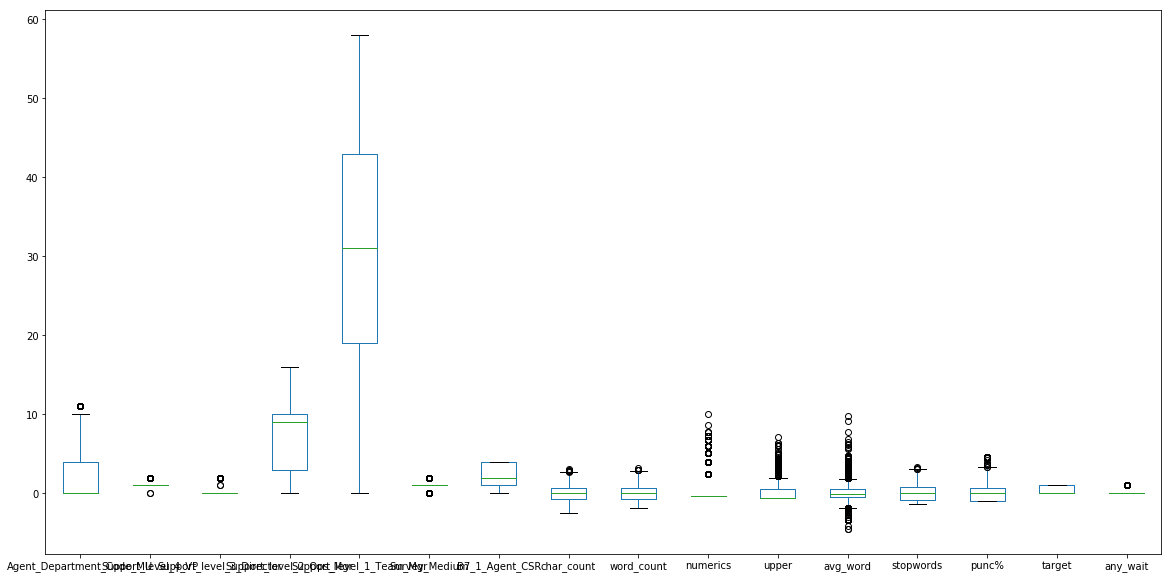

In [118]:
checkdata.plot(kind='box',figsize=(20,10))

In [1110]:
#cols = ['target']  + [col for col in checkdata if col != 'target']
#checkdata = checkdata[cols]

In [1111]:
#final.shape

In [1112]:
'''
from pandas.core.common import array_equivalent

def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if array_equivalent(ia, ja):
                    dups.append(cs[i])
                    break

    return dups
'''

'\nfrom pandas.core.common import array_equivalent\n\ndef duplicate_columns(frame):\n    groups = frame.columns.to_series().groupby(frame.dtypes).groups\n    dups = []\n\n    for t, v in groups.items():\n\n        cs = frame[v].columns\n        vs = frame[v]\n        lcs = len(cs)\n\n        for i in range(lcs):\n            ia = vs.iloc[:,i].values\n            for j in range(i+1, lcs):\n                ja = vs.iloc[:,j].values\n                if array_equivalent(ia, ja):\n                    dups.append(cs[i])\n                    break\n\n    return dups\n'

In [1113]:
#dups = duplicate_columns(final)
#final_clean1 = final.drop(dups, axis=1)

In [1114]:
#final_clean1 = final_clean1.iloc[:, ~final_clean1.columns.duplicated()]

In [1115]:
#print(final.shape)
#print(final_clean1.shape)

In [1116]:
#final_clean1.info()

In [1117]:
#final_clean1.head()

In [1118]:
#col = final.columns #final_clean1.columns

In [1119]:
#col

In [1120]:
#X = final_clean[:,-'Had_knowledge_dummy']
#labels = final['target']#final_clean1['target']
#X = final #.drop(['target'],axis=1)
#final_clean1.drop(['target'],axis=1)

In [1121]:
'''# Training
checkdata_1 = checkdata.copy()
checkdata2 = checkdata.copy()
checkdata3 = checkdata.copy()
checkdata_1 = checkdata_1.set_index('Respondent_Id')
checkdata_1 = checkdata_1.drop(['Feedback','B7_1_Agent_CSR'],axis=1)
print(checkdata_1.shape)

checkdata2 = checkdata2.set_index('Respondent_Id')
checkdata2 = checkdata2[['target','B7_1_Agent_CSR']]
print(checkdata2.shape)

checkdata3 = checkdata3.set_index('Respondent_Id')
checkdata3 = checkdata3.drop(['Feedback'],axis=1)
print(checkdata3.shape)
'''# Training


"# Training\ncheckdata_1 = checkdata.copy()\ncheckdata2 = checkdata.copy()\ncheckdata3 = checkdata.copy()\ncheckdata_1 = checkdata_1.set_index('Respondent_Id')\ncheckdata_1 = checkdata_1.drop(['Feedback','B7_1_Agent_CSR'],axis=1)\nprint(checkdata_1.shape)\n\ncheckdata2 = checkdata2.set_index('Respondent_Id')\ncheckdata2 = checkdata2[['target','B7_1_Agent_CSR']]\nprint(checkdata2.shape)\n\ncheckdata3 = checkdata3.set_index('Respondent_Id')\ncheckdata3 = checkdata3.drop(['Feedback'],axis=1)\nprint(checkdata3.shape)\n"

In [1122]:
checkdata.head()

,Agent_Department_Code_MU,Support_level_4_VP,Support_level_3_Director,Support_level_2_Ops_Mgr,Support_level_1_Team_Mgr,Survey_Medium,B7_1_Agent_CSR,char_count,word_count,numerics,upper,avg_word,stopwords,punc%,target,any_wait
Respondent_Id,,,,,,,,,,,,,,,,
3523509,0,2,2,12,50,1,0,0.810023,0.813953,-0.241527,0.680326,-0.281190,0.830269,0.250435,1,0
3523102,1,1,0,10,17,1,4,-0.626084,-0.599104,-0.241527,-0.318946,-0.807520,-0.610997,-0.415379,0,0
3523089,0,1,0,10,55,1,4,-0.456417,-0.506948,-0.241527,-0.318946,1.342276,-0.542365,0.616632,0,0
3523082,0,1,0,10,11,1,4,-0.620024,-0.599104,-0.241527,-0.318946,-0.436865,-0.610997,1.665289,0,0
3523075,0,2,2,6,57,1,4,0.397975,0.291736,-0.241527,0.014144,0.111703,0.212584,0.267080,0,0


In [119]:
# Training

#checkdata1 = checkdata.copy()
checkdata2 = checkdata.copy()
checkdata3 = checkdata.copy()
#checkdata4 = final.copy()

#checkdata1 = checkdata1.drop(['Feedback1'],axis=1)
#print(checkdata1.shape)


checkdata2 = checkdata2.drop(['B7_1_Agent_CSR'],axis=1)
print(checkdata2.shape)


checkdata3 = checkdata3[['B7_1_Agent_CSR','target']]
print(checkdata3.shape)


#checkdata4 = checkdata4.drop(['Feedback1','B7_1_Agent_CSR'],axis=1)
#print(checkdata4.shape)

(10456, 15)
(10456, 2)


In [120]:
checkdata2.head()

,Agent_Department_Code_MU,Support_level_4_VP,Support_level_3_Director,Support_level_2_Ops_Mgr,Support_level_1_Team_Mgr,Survey_Medium,char_count,word_count,numerics,upper,avg_word,stopwords,punc%,target,any_wait
Respondent_Id,,,,,,,,,,,,,,,
3523509,0,2,2,12,50,1,1.191368,1.234117,-0.280065,1.608161,-0.228992,1.281582,0.938176,1,0
3523102,1,1,0,10,17,1,-1.441205,-1.265481,-0.280065,-0.604802,-1.002406,-1.394193,-1.019599,0,0
3523089,0,1,0,10,55,1,-0.284043,-0.544802,-0.280065,-0.604802,1.515891,-0.794167,1.381740,0,0
3523082,0,1,0,10,11,1,-1.350588,-1.265481,-0.280065,-0.604802,-0.445236,-1.394193,2.146401,0,0
3523075,0,2,2,6,57,1,0.941246,0.890240,-0.280065,0.501679,0.264732,0.826167,0.962264,0,0


In [121]:
# Training/Scoring
# model1
#labels1 = checkdata1['target'] #final_clean1['target']
#X1 = checkdata1.drop(['target'],axis=1) #final_clean1.drop(['target'],axis=1)

# Training/Scoring
# model2
labels2 = checkdata2['target'] #final_clean1['target']
X2 = pd.DataFrame(checkdata2.drop(['target'],axis=1)) #final_clean1.drop(['target'],axis=1)

#model3
labels3 = checkdata3['target'] #final_clean1['target']
X3 = pd.DataFrame(checkdata3.drop(['target'],axis=1)) #final_clean1.drop(['target'],axis=1)

#model4
#labels4 = checkdata4['target'] #final_clean1['target']
#X4 = checkdata4.drop(['target'],axis=1) #final_clean1.drop(['target'],axis=1)

In [122]:
X2.shape, X3.shape

((10456, 14), (10456, 1))

In [123]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, labels2, test_size = .4, random_state=seed)

# Using smote to increase the number of under-represented class
sm1 = SMOTE(random_state = seed, ratio = 'minority')

X_train_res2, y_train_res2 = sm.fit_sample(X_train2, y_train2)
X_train_res2.shape, y_train_res2.shape, X_val2.shape, y_val2.shape

((8832, 14), (8832,), (4183, 14), (4183,))

In [124]:
X_train_res2 = pd.DataFrame(X_train_res2)
#y_train_res2 = pd.DataFrame(y_train_res2)

X_train_res2.columns = X2.columns
#y_train_res2.columns = ['target']
X_train_res2.shape, y_train_res2.shape

((8832, 14), (8832,))

In [125]:
X_train3, X_val3, y_train3, y_val3 = train_test_split(X3, labels3, test_size = .4, random_state=seed)

# Using smote to increase the number of under-represented class
sm2 = SMOTE(random_state = seed, ratio = 'minority')

X_train_res3, y_train_res3 = sm.fit_sample(X_train3, y_train3)
X_train_res3.shape, y_train_res3.shape, X_val3.shape, y_val3.shape

((8832, 1), (8832,), (4183, 1), (4183,))

In [126]:
X_train_res3 = pd.DataFrame(X_train_res3)
#y_train_res3 = pd.DataFrame(y_train_res3)

X_train_res3.columns = X3.columns
#y_train_res3.columns = ['target']
X_train_res3.shape, y_train_res3.shape

((8832, 1), (8832,))

In [127]:
'''# Training
from sklearn.model_selection import train_test_split

# model 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, labels1, test_size = .3, random_state = seed)

# model 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, labels2, test_size = .3, random_state = seed)

# model 3
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, labels3, test_size = .3, random_state = seed)

# model 4
#X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, labels4, test_size = .3, random_state = seed)
'''

'# Training\nfrom sklearn.model_selection import train_test_split\n\n# model 1\nX_train1, X_test1, y_train1, y_test1 = train_test_split(X1, labels1, test_size = .3, random_state = seed)\n\n# model 2\nX_train2, X_test2, y_train2, y_test2 = train_test_split(X2, labels2, test_size = .3, random_state = seed)\n\n# model 3\nX_train3, X_test3, y_train3, y_test3 = train_test_split(X3, labels3, test_size = .3, random_state = seed)\n\n# model 4\n#X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, labels4, test_size = .3, random_state = seed)\n'

In [128]:
#print(X_train1.shape)
print(X_train_res2.shape)
print(X_train_res3.shape)

(8832, 14)
(8832, 1)


In [129]:
# import metrics for model evaluation
# Training
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix,classification_report,precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
#sklearn.metrics.cohen_kappa_score(y1, y2, labels=None, weights=None, sample_weight=None)
# create function to evaluate model performance

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    #recall = recall_score(y_test,y_pred,average='micro')
    matrix = confusion_matrix(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred, sample_weight=None)
    #tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    #precision = precision_score(y_test,y_pred,average='micro')
    print("accuracy :" +str(accuracy))
    print("cohen_kappa :" +str(cohen_kappa))
    #print("precision :" +str(precision))
    print("matrix :")
    print(matrix)
    #print("report :")
    #print(report)
    return None# accuracy

In [130]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation

In [137]:


# fix the input dimenstion to number of feature terms
input_dimenation = int(X_train_res2.shape[1])

# create the output dimenstion
output = 1

# create the batch size
batch = 32

# epoch
epoch = 10



# Function to create model, required for KerasClassifier
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(input_dimenation, input_dim=input_dimenation, activation='relu'))
    model.add(Dense(output, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

/home/xavient/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/home/xavient/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/home/xavient/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/home/xavient/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning Fa

('XGB', 0.6710854347837227, 0.03891224920315576)
('RF', 0.7540831595291657, 0.077784439536048)
('DT', 0.6995130494047954, 0.08321417615961113)
('ADA', 0.602798844949601, 0.04029544898995999)
('SVC', 0.6354146702674448, 0.026116824013876983)
('LM', 0.6044992646418268, 0.04237417481269454)
('TF', 0.6075552287297008, 0.040791013144925205)


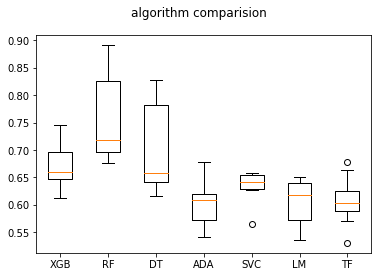

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

from sklearn import model_selection
import matplotlib.pyplot as plt

# generate list of models  
models = []
models.append(('XGB', XGBClassifier(n_estimators = 10,learning_rate=.1)))
models.append(('RF', RandomForestClassifier(n_estimators = 10 ,random_state=21)))
models.append(('DT', DecisionTreeClassifier(splitter='random', random_state=21)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 10,learning_rate=.1, random_state=21)))
models.append(('SVC', SVC( random_state=21)))
models.append(('LM', LogisticRegression()))
models.append(('TF', KerasClassifier(build_fn=baseline_model, epochs=epoch, batch_size=batch, verbose=0))) 

# check model performance
results = []
names = []
seed = 7
msgall = []
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=seed)
    #cv_results = cross_val_score(model, X_train_res, y_train_res, cv=kfold, scoring = scoring)
    cv_results = cross_val_score(model, X_train_res2, y_train_res2, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print (msg)
    msgall.append(msg)

# compare algorithms
fig = plt.figure()
fig.suptitle("algorithm comparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [140]:
'''
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(10000, 100, input_length=input_dimenation))
    model_conv.add(Dropout(0.2))
    model_conv.add(Conv1D(64, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam',    metrics=['accuracy'])
    return model_conv
model_conv = create_conv_model()
model_conv.fit(X_train_res3, y_train_res3, validation_split=0.4, epochs = 3)
'''

"\ndef create_conv_model():\n    model_conv = Sequential()\n    model_conv.add(Embedding(10000, 100, input_length=input_dimenation))\n    model_conv.add(Dropout(0.2))\n    model_conv.add(Conv1D(64, 5, activation='relu'))\n    model_conv.add(MaxPooling1D(pool_size=4))\n    model_conv.add(LSTM(100))\n    model_conv.add(Dense(1, activation='sigmoid'))\n    model_conv.compile(loss='binary_crossentropy', optimizer='adam',    metrics=['accuracy'])\n    return model_conv\nmodel_conv = create_conv_model()\nmodel_conv.fit(X_train_res3, y_train_res3, validation_split=0.4, epochs = 3)\n"

In [141]:
#evaluate_classes(model_conv,X_test1,y_test1)

In [203]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation

# fix the input dimenstion to number of feature terms
#input_dimenation = int(X1.shape[1])

# create the output dimenstion
output = 1

# create the batch size
#batch = int(round(X4.shape[0]/10,0))

# epoch
epoch = 10



# Function to create model, required for KerasClassifier
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(input_dimenation, input_dim=input_dimenation, activation='relu'))
    model.add(Dense(output, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [142]:
# Training
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import scipy.stats as st
from sklearn.grid_search import RandomizedSearchCV,GridSearchCV

# Create the random grid

# First create the base model to tune
n_estimators = [int(x) for x in np.linspace(1000, 10000, num = 10)]
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
learning_rate = [int(x) for x in np.linspace(0.01, 0.1, num = 2)]
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)
random_state=seed
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": n_estimators,
    "learning_rate": learning_rate,
    "max_depth": max_depth,
    "learning_rate": st.uniform(0.05, 0.1),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    "reg_alpha": from_zero_positive,
    "min_child_weight": from_zero_positive,
    "random_state":random_state
}

#xgbclass = XGBClassifier()
xgbclass2 = XGBClassifier(nthreads=-1)  
xgbclass3 = XGBClassifier(nthreads=-1)  

/home/xavient/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/home/xavient/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [1188]:
#X_train1.shape,y_train1.shape

In [1189]:
#X_train2.shape,y_train2.shape

In [1190]:
#X_train6.shape,y_train6.shape

In [1191]:
# Training
# model 1
#xgb1 = XGBClassifier(n_estimators=5000,learning_rate=.1, max_depth=4, min_child_weight=200) 
#xgb1.fit(X_train1,y_train1)

# model 2
#xgb2 = XGBClassifier(n_estimators=5000,learning_rate=.1, max_depth=4, min_child_weight=200) 
#xgb2.fit(X_train2,y_train2)

In [1192]:
#xgbclass = XGBClassifier(n_estimators = 2000, max_depth = 3, learning_rate = 0.1)

In [1193]:
#xgbclass1.fit(X_train1,y_train1) 

In [143]:
xgbclass2.fit(X_train_res2,y_train_res2) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [144]:
xgbclass3.fit(X_train_res3,y_train_res3) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [145]:
# Training
## Check accuracy on test set
#print("xgb_accuracy1")
#xgb_accuracy1 = evaluate(xgbclass,X_test1,y_test1)
#print(xgb_accuracy1)

print("xgb_accuracy2")
xgb_accuracy2 = evaluate(xgbclass2,X_val2,y_val2)
print(xgb_accuracy2)

print("xgb_accuracy3")
xgb_accuracy3 = evaluate(xgbclass3,X_val3,y_val3)
print(xgb_accuracy3)

#print("xgb_accuracy4")
#xgb_accuracy4 = evaluate(xgbclass4,X_test4,y_test4)
#print(xgb_accuracy4)

#print("xgb_accuracy5")
#xgb_accuracy4 = evaluate(xgbclass,X_test6,y_test6)
#print(xgb_accuracy4)

xgb_accuracy2
accuracy :0.7021276595744681
cohen_kappa :0.27096547504715907
matrix :
[[2363  604]
 [ 642  574]]
None
xgb_accuracy3
accuracy :0.8711451111642362
cohen_kappa :0.6815896867594974
matrix :
[[2736  231]
 [ 308  908]]
None


/home/xavient/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/home/xavient/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



XGBOOST1 feature importance


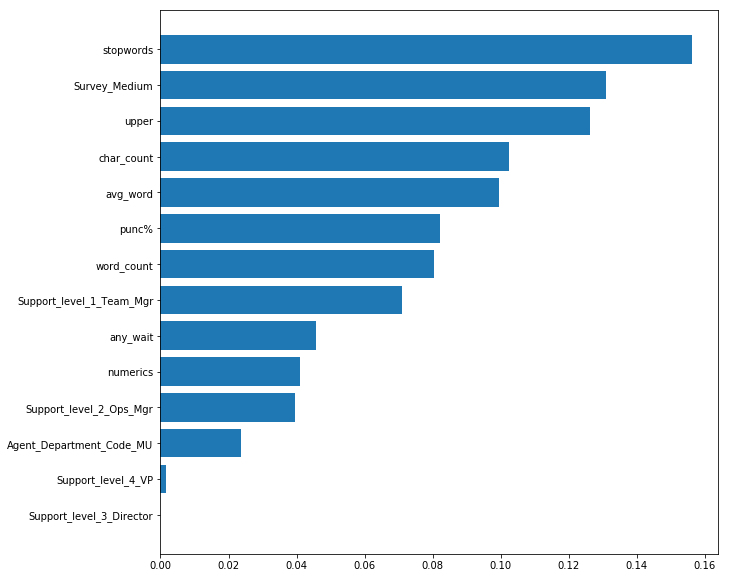

In [1198]:
# feature importance plots

print("XGBOOST1 feature importance")
feature_names = X2.columns
feature_importance = xgbclass2.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
feature_names[sorted_idx]
plt.show()

In [ ]:
xgbclass.feature_importances_

In [ ]:
# feature importance plots

print("XGBOOST2 feature importance")
feature_names = X2.columns
feature_importance = xgbclass2.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
feature_names[sorted_idx]
plt.show()

In [ ]:
# feature importance plots

print("XGBOOST3 feature importance")
feature_names = X3.columns
feature_importance = xgbclass3.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
feature_names[sorted_idx]
plt.show()

In [ ]:
'''# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)
'''

In [146]:
# First create the base model to tune

rf = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_state = [21]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'random_state':random_state}
#pprint(random_grid)

In [147]:
# Random search of parameters, using 10 fold cross validation,
# search across 50 different combinations, and use all available cores
rf2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
rf2.fit(X_train_res2,y_train_res2)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'random_state': [21]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          scoring=None, verbose=0)

In [148]:
# Random search of parameters, using 10 fold cross validation,
# search across 50 different combinations, and use all available cores
rf3 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
rf3.fit(X_train_res3,y_train_res3)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'random_state': [21]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          scoring=None, verbose=0)

In [149]:
# Training
## Check accuracy on test set
#print("xgb_accuracy1")
#xgb_accuracy1 = evaluate(xgbclass,X_test1,y_test1)
#print(xgb_accuracy1)

print("rf_accuracy2")
rf_accuracy2 = evaluate(rf2,X_val2,y_val2)
print(xgb_accuracy2)

print("rf_accuracy3")
rf_accuracy3 = evaluate(rf3,X_val3,y_val3)
print(xgb_accuracy3)

#print("xgb_accuracy4")
#xgb_accuracy4 = evaluate(xgbclass4,X_test4,y_test4)
#print(xgb_accuracy4)

#print("xgb_accuracy5")
#xgb_accuracy4 = evaluate(xgbclass,X_test6,y_test6)
#print(xgb_accuracy4)

rf_accuracy2
accuracy :0.6930432703801099
cohen_kappa :0.21888700634812142
matrix :
[[2422  545]
 [ 739  477]]
None
rf_accuracy3
accuracy :0.8711451111642362
cohen_kappa :0.6815896867594974
matrix :
[[2736  231]
 [ 308  908]]
None


In [150]:
# Baseline Model on the Sonar Dataset
#from sklearn.model_selection import GridSearchCV
import numpy as np
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm

# fix the input dimenstion to number of feature terms
input_dimenation = X_train_res2.shape[1]
# INPUT: model parameters
epochs_input = 100
batch_size_input = 50

In [151]:
# RandomizedSearchCV to pick hyperparamenters
sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)

# create model
def create_model():
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(input_dimenation,)))
    model.add(Dense(input_dimenation, input_dim=input_dimenation, kernel_initializer='uniform', activation='relu',kernel_constraint=maxnorm(3)))
    #model.add(Dropout(0.2))
    #model.add(Dense(input_dimenation, input_dim=input_dimenation, kernel_initializer='uniform', activation='relu',kernel_constraint=maxnorm(3)))
    #model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [152]:
# create model
model_mlp = KerasClassifier(build_fn = create_model, epochs = epochs_input, batch_size = batch_size_input, validation_split=0.4)
# Fit the model
model_mlp.fit(X_train_res2, y_train_res2)

Train on 5299 samples, validate on 3533 samples
Epoch 1/100
5299/5299 [==============================] - 2s 289us/step - loss: 0.6148 - acc: 0.7035 - val_loss: 0.9144 - val_acc: 0.2080
Epoch 2/100
5299/5299 [==============================] - 0s 91us/step - loss: 0.5761 - acc: 0.7154 - val_loss: 0.8640 - val_acc: 0.3765
Epoch 3/100
5299/5299 [==============================] - 0s 90us/step - loss: 0.5675 - acc: 0.7154 - val_loss: 0.9235 - val_acc: 0.3631
Epoch 4/100
5299/5299 [==============================] - 0s 86us/step - loss: 0.5658 - acc: 0.7190 - val_loss: 0.8782 - val_acc: 0.4019
Epoch 5/100
5299/5299 [==============================] - 1s 103us/step - loss: 0.5638 - acc: 0.7203 - val_loss: 0.9188 - val_acc: 0.3691
Epoch 6/100
5299/5299 [==============================] - 1s 97us/step - loss: 0.5644 - acc: 0.7207 - val_loss: 0.9084 - val_acc: 0.3598
Epoch 7/100
5299/5299 [==============================] - 0s 87us/step - loss: 0.5638 - acc: 0.7186 - val_loss: 0.9570 - val_acc: 0.345

In [153]:
# Check accuracy on test set

tf_accuracy = evaluate(model_mlp,X_val2,y_val2)

accuracy :0.722448003825006
cohen_kappa :0.1803793489463833
matrix :
[[2755  212]
 [ 949  267]]


In [ ]:
# import pickle
import pickle
################XGBoost model save
# save XGB_smote model to disk
respected_mytime1 = 'respected_mytime1.sav'
pickle.dump(xgbclass1, open(respected_mytime1, 'wb'))

################XGBoost model save
# save XGB_smote model to disk
respected_mytime2 = 'respected_mytime2.sav'
pickle.dump(xgbclass2, open(respected_mytime2, 'wb'))

################XGBoost model save
# save XGB_smote model to disk
respected_mytime2 = 'respected_mytime3.sav'
pickle.dump(xgbclass2, open(respected_mytime2, 'wb'))

In [ ]:
# import pickle
import pickle
################XGBoost model save
# save XGB_smote model to disk
xgbclass1 = pickle.load(open('respected_mytime1.sav', 'rb'))
print("xgb1 loaded: ")# + str(result))

################XGBoost model save
# save XGB_smote model to disk
xgbclass2 = pickle.load(open('respected_mytime2.sav', 'rb'))
print("xgb2 loaded: ")# + str(result))

################XGBoost model save
# save XGB_smote model to disk
xgbclass3 = pickle.load(open('respected_mytime3.sav', 'rb'))
print("xgb3 loaded: ")# + str(result))

In [ ]:
#xgb.best_estimator_

In [ ]:
#pred = xgbclass.predict(final)

In [ ]:
#pred = pd.DataFrame(pred,index=checkdata1['Respondent_Id'])
#final_result=pd.concat([X,pred],axis=1)

In [ ]:
def uncondition(rating):
    if rating == 0:
        return 'Excellent'
    elif rating == 1:
        return 'Very good'
    elif rating == 2:
        return 'Good' 
    elif rating == 3:
        return 'Fair'
    elif rating == 4:
        return 'Poor'
    else:
        return "missing"

In [ ]:
#final_result.columns = ['Agent_Department_Code_MU','Support_level_4_VP','Support_level_3_Director','Support_level_2_Ops_Mgr',
#                        'Support_level_1_Team_Mgr','Survey_Medium','word_count','char_count','numerics','upper','avg_word',
#                        'stopwords','punc%','is_Excellent','is_Vgood','is_good','is_fair','is_poor','any_wait','prediction']

In [ ]:
#final_result['prediction_verbose'] = final_result['prediction'].apply(lambda x: uncondition(x))

In [ ]:
#final_result.to_csv("Had_knowledgeonehot.csv")

In [ ]:
#Scoring 1
#'''
pred1 = xgbclass1.predict_proba(X1)
pred1 = pd.DataFrame(pred1,index=checkdatax['Respondent_Id'])
pred1.columns = ['prediction0','prediction1']
##final_result=pd.concat([X,pred],axis=1)\
#pred['prediction_verbose'] = pred['prediction'].apply(lambda x: uncondition(x))
#pred1['prediction1'].to_csv("respectedmytime_noexcellent1.csv")
#'''

In [ ]:
#Scoring 2
#'''
pred2 = xgbclass2.predict_proba(X2)
pred2 = pd.DataFrame(pred2,index=checkdatax['Respondent_Id'])
pred2.columns = ['prediction0','prediction1']
##final_result=pd.concat([X,pred],axis=1)\
#pred['prediction_verbose'] = pred['prediction'].apply(lambda x: uncondition(x))
#pred2['prediction1'].to_csv("respectedmytime_noexcellent2.csv")
#'''

In [ ]:
#Scoring 3
#'''
pred3 = xgbclass3.predict_proba(X2)
pred3 = pd.DataFrame(pred3,index=checkdatax['Respondent_Id'])
pred3.columns = ['prediction0','prediction1']
##final_result=pd.concat([X,pred],axis=1)\
#pred['prediction_verbose'] = pred['prediction'].apply(lambda x: uncondition(x))
#pred3['prediction1'].to_csv("respectedmytime_noexcellent3.csv")
#'''